In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import bz2
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
def read_fasttext_file(path, limit=None):
    data = []
    with bz2.open(path, mode='rt', encoding='utf-8') as file:
        for i, line in enumerate(file):
            if limit and i >= limit:
                break
            label, text = line.strip().split(' ', 1)
            data.append((label.replace('__label__', ''), text))
    return pd.DataFrame(data, columns=['label', 'review'])

df_train = read_fasttext_file('train.ft.txt.bz2')

In [4]:
df_train.head()

,label,review
0,2,Stuning even for the non-gamer: This sound tra...
1,2,The best soundtrack ever to anything.: I'm rea...
2,2,Amazing!: This soundtrack is my favorite music...
3,2,Excellent Soundtrack: I truly like this soundt...
4,2,"Remember, Pull Your Jaw Off The Floor After He..."


In [5]:
df_train.shape

(3600000, 2)

In [6]:
df_train.isnull().sum()

label     0
review    0
dtype: int64

## Data Processing

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sadık\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import string

def clean_review(text):
    # 1. Remove extra spaces
    text = " ".join(text.split())
    # 2. Convert to lowercase
    text = text.lower()
    # 3. Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # 4. Cleaning Stop-Words
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df_train["cleaned_review"] = df_train["review"].apply(clean_review)

In [11]:
df_train.head()

,label,review,cleaned_review
0,2,Stuning even for the non-gamer: This sound tra...,stuning even nongamer sound track beautiful pa...
1,2,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anything im reading lot r...
2,2,Amazing!: This soundtrack is my favorite music...,amazing soundtrack favorite music time hands i...
3,2,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack truly like soundtrack enj...
4,2,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...


## Extracting basic statistics on text data

In [13]:
df_train['word_count'] = df_train['cleaned_review'].apply(lambda x: len(x.split()))

df_train['char_count'] = df_train['cleaned_review'].apply(len)

df_train['sentence_count'] = df_train['review'].apply(lambda x: x.count('.') + 1)

In [14]:
df_train.drop("review", axis=1, inplace=True)

In [15]:
df_train.head()

,label,cleaned_review,word_count,char_count,sentence_count
0,2,stuning even nongamer sound track beautiful pa...,43,283,3
1,2,best soundtrack ever anything im reading lot r...,49,322,6
2,2,amazing soundtrack favorite music time hands i...,74,525,6
3,2,excellent soundtrack truly like soundtrack enj...,72,540,8
4,2,remember pull jaw floor hearing youve played g...,47,308,4


## Visualization

### Most Common Words

#### For Negative Review (Label=1)

In [19]:
words_label_1 = ' '.join(df_train[df_train["label"] == "1"]["cleaned_review"]).split()
word_counts_1 = Counter(words_label_1)
most_common_1 = word_counts_1.most_common(20)
words_1, counts_1 = zip(*most_common_1)

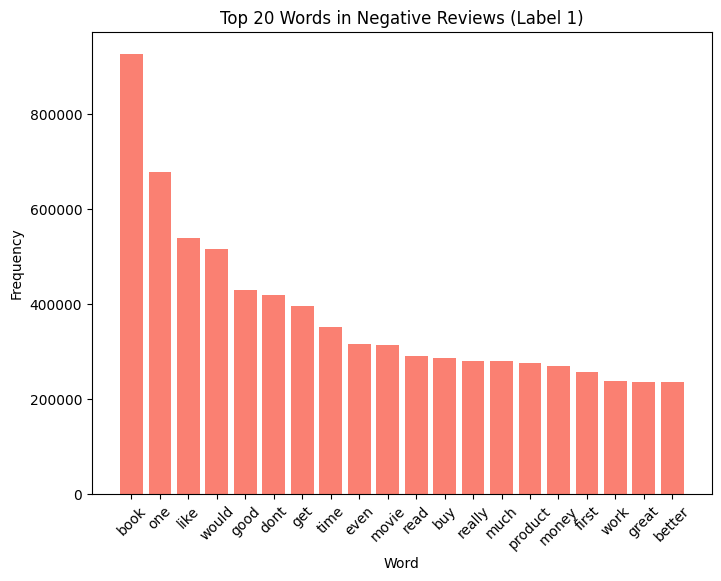

In [20]:
plt.figure(figsize=(8, 6))

plt.bar(words_1, counts_1, color='salmon')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 20 Words in Negative Reviews (Label 1)")
plt.xticks(rotation=45)

plt.show()  

#### For Positive Review (Label=2)

In [22]:
words_label_2 = ' '.join(df_train[df_train["label"] == "2"]["cleaned_review"]).split()
word_counts_2 = Counter(words_label_2)
most_common_2 = word_counts_2.most_common(20)
words_2, counts_2 = zip(*most_common_2)

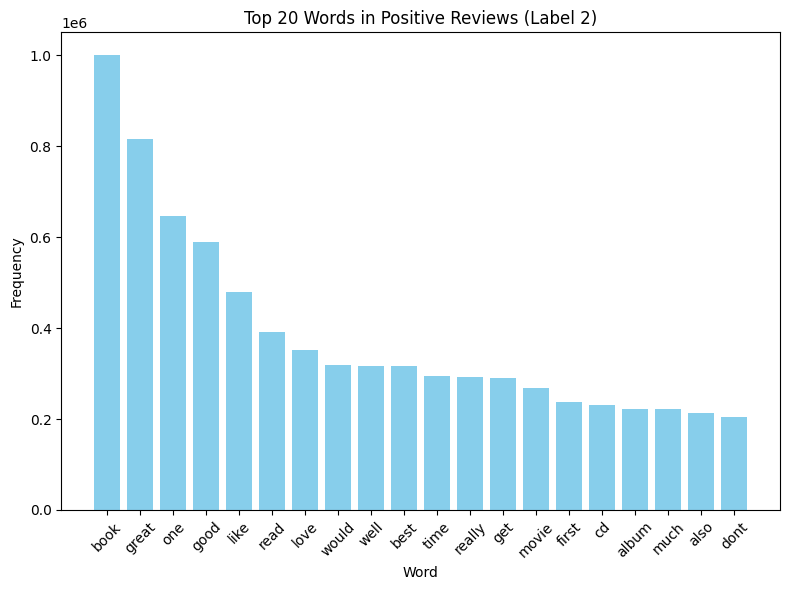

In [23]:
plt.figure(figsize=(8, 6))

plt.bar(words_2, counts_2, color='skyblue')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 20 Words in Positive Reviews (Label 2)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Distribution of Comment Word Count

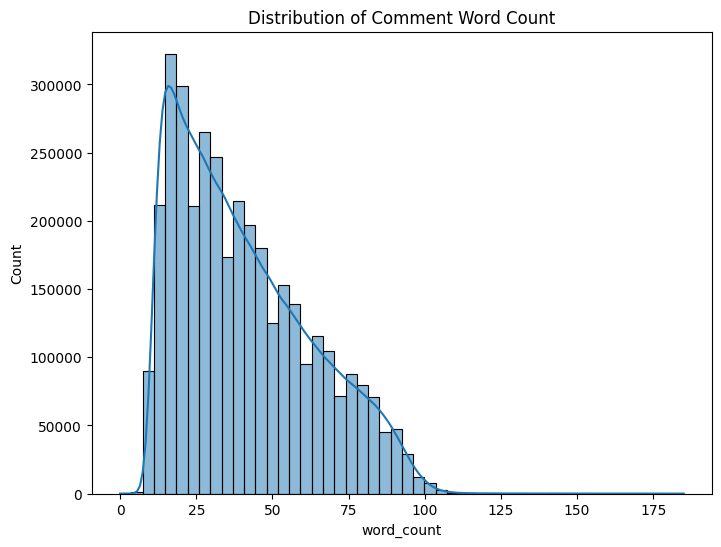

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(df_train['word_count'], bins=50, kde=True)
plt.title("Distribution of Comment Word Count")
plt.show()

### Comment Sentiment vs. Word Count Analysis

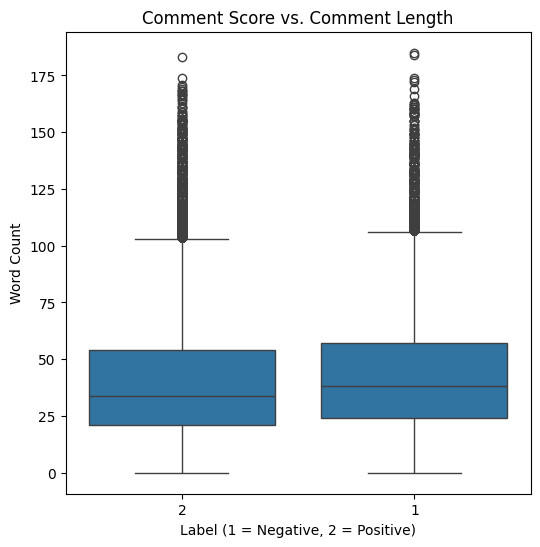

In [27]:
plt.figure(figsize=(6,6))
sns.boxplot(x='label', y='word_count', data=df_train)
plt.title("Comment Score vs. Comment Length")
plt.xlabel("Label (1 = Negative, 2 = Positive)")
plt.ylabel("Word Count")
plt.show()